     Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


C:\Users\akhil\AppData\Local\Temp\ipykernel_21608\4163592490.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Age'] = df['Age'].fillna(df['Age'].mean())


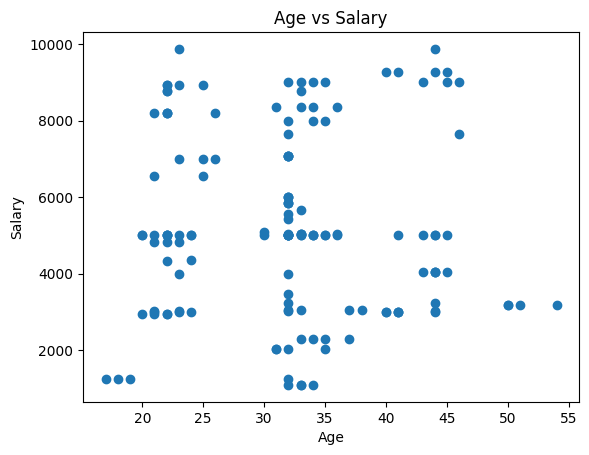

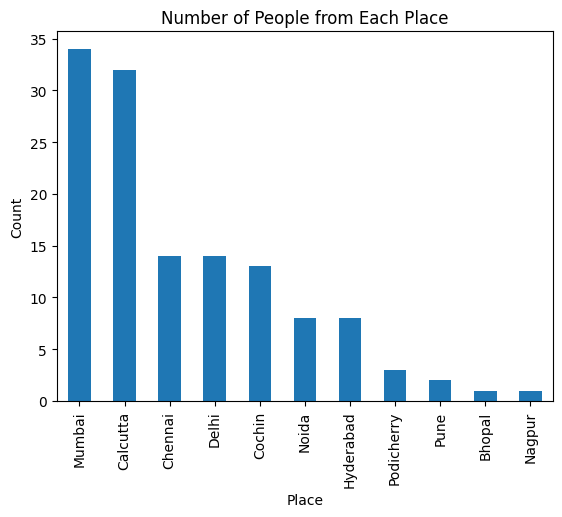

In [12]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

url = "https://drive.google.com/uc?id=1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_"
df = pd.read_csv(url)

df.columns = df.columns.str.strip()

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

df['Age'] = df['Age'].replace(0, pd.NA)
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

df = df.infer_objects()

df = df.drop_duplicates()

z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))
df_no_outliers = df[(z_scores < 3).all(axis=1)]

Q1 = df.select_dtypes(include=['float64', 'int64']).quantile(0.25)
Q3 = df.select_dtypes(include=['float64', 'int64']).quantile(0.75)
IQR = Q3 - Q1
df_no_outliers_iqr = df[~((df.select_dtypes(include=['float64', 'int64']) < (Q1 - 1.5 * IQR)) | 
                          (df.select_dtypes(include=['float64', 'int64']) > (Q3 + 1.5 * IQR))).any(axis=1)]

filtered_data = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
print(filtered_data)

plt.scatter(df['Age'], df['Salary'])
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

place_count = df['Place'].value_counts()
place_count.plot(kind='bar', title='Number of People from Each Place')
plt.ylabel('Count')
plt.show()

df_encoded = pd.get_dummies(df, drop_first=True)

label_encoder = LabelEncoder()
df['Place'] = label_encoder.fit_transform(df['Place'])

scaler_standard = StandardScaler()
df_scaled_standard = df_encoded.copy()
df_scaled_standard[['Age', 'Salary']] = scaler_standard.fit_transform(df_encoded[['Age', 'Salary']])

scaler_minmax = MinMaxScaler()
df_scaled_minmax = df_encoded.copy()
df_scaled_minmax[['Age', 'Salary']] = scaler_minmax.fit_transform(df_encoded[['Age', 'Salary']])
